# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:

file_path = 'C:\\Users\\LENOVO\\Desktop\\Project 1 for Data\\pima-indians-diabetes+(3).csv'

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [6]:
# Display the first 10 samples in the DataFrame
print(df.head(10))

   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


# 3. Print the datatypes of each column and the shape of the dataset

In [7]:
# Print the data types of each column
print("Data Types:")
print(df.dtypes)

# Print the shape of the dataset
print("\nShape of the Dataset:")
print(df.shape)

Data Types:
Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Shape of the Dataset:
(768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
columns_to_replace = ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass']  # Replace with the actual column names

# Replace 0s with the median of each column
for column in columns_to_replace:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

# Print the DataFrame after replacing 0s with the median
print(df.head(10))  # Display the first 10 rows for verification


   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35   125  33.6  0.627   50      1
1     1    85    66    29   125  26.6  0.351   31      0
2     8   183    64    29   125  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     4   137    40    35   168  43.1  2.288   33      1
5     5   116    74    29   125  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115    72    29   125  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96    29   125  32.3  0.232   54      1


# 5. Print the descriptive statistics of each & every column using describe() function

In [9]:
# Print descriptive statistics of each column
print(df.describe())

             Preg        Plas        Pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     4.423177  121.656250   72.386719   29.108073  140.671875   32.455208   
std      2.980481   30.438286   12.096642    8.791221   86.383060    6.875177   
min      1.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      2.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      4.000000  117.000000   72.000000   29.000000  125.000000   32.300000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

# 6. See the distribution of 'Class' variable and plot it using appropriate graph


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


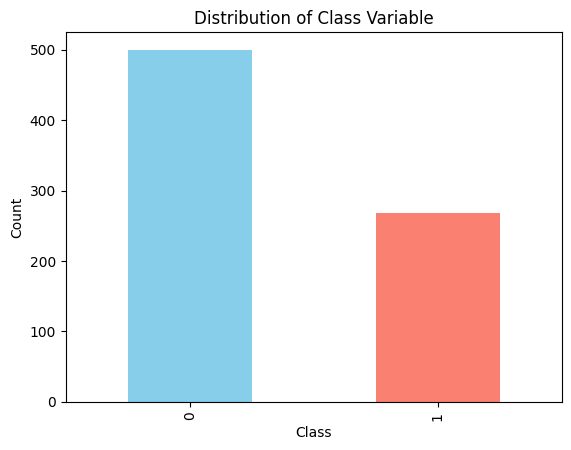

In [14]:
!pip install matplotlib

import matplotlib.pyplot as plt
# Plot the distribution of the 'Class' variable
class_distribution = df['class'].value_counts()
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])

# Customize the plot
plt.title('Distribution of Class Variable')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

     ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
     -------- ------------------------------ 61.4/294.6 kB 3.2 MB/s eta 0:00:01
     ---------- -------------------------- 81.9/294.6 kB 919.0 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/294.6 kB 939.4 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/294.6 kB 939.4 kB/s eta 0:00:01
     -------------------- --------------- 163.8/294.6 kB 701.4 kB/s eta 0:00:01
     -------------------- --------------- 163.8/294.6 kB 701.4 kB/s eta 0:00:01
     --------------------- -------------- 174.1/294.6 kB 615.9 kB/s eta 0:00:01
     --------------------- -------------- 174.1/294.6 kB 615.9 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/294.6 kB 513.4 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/294.6 kB 513.4 kB/s eta 0:00:01
     --------------------------- -------- 225.3/294.6 


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


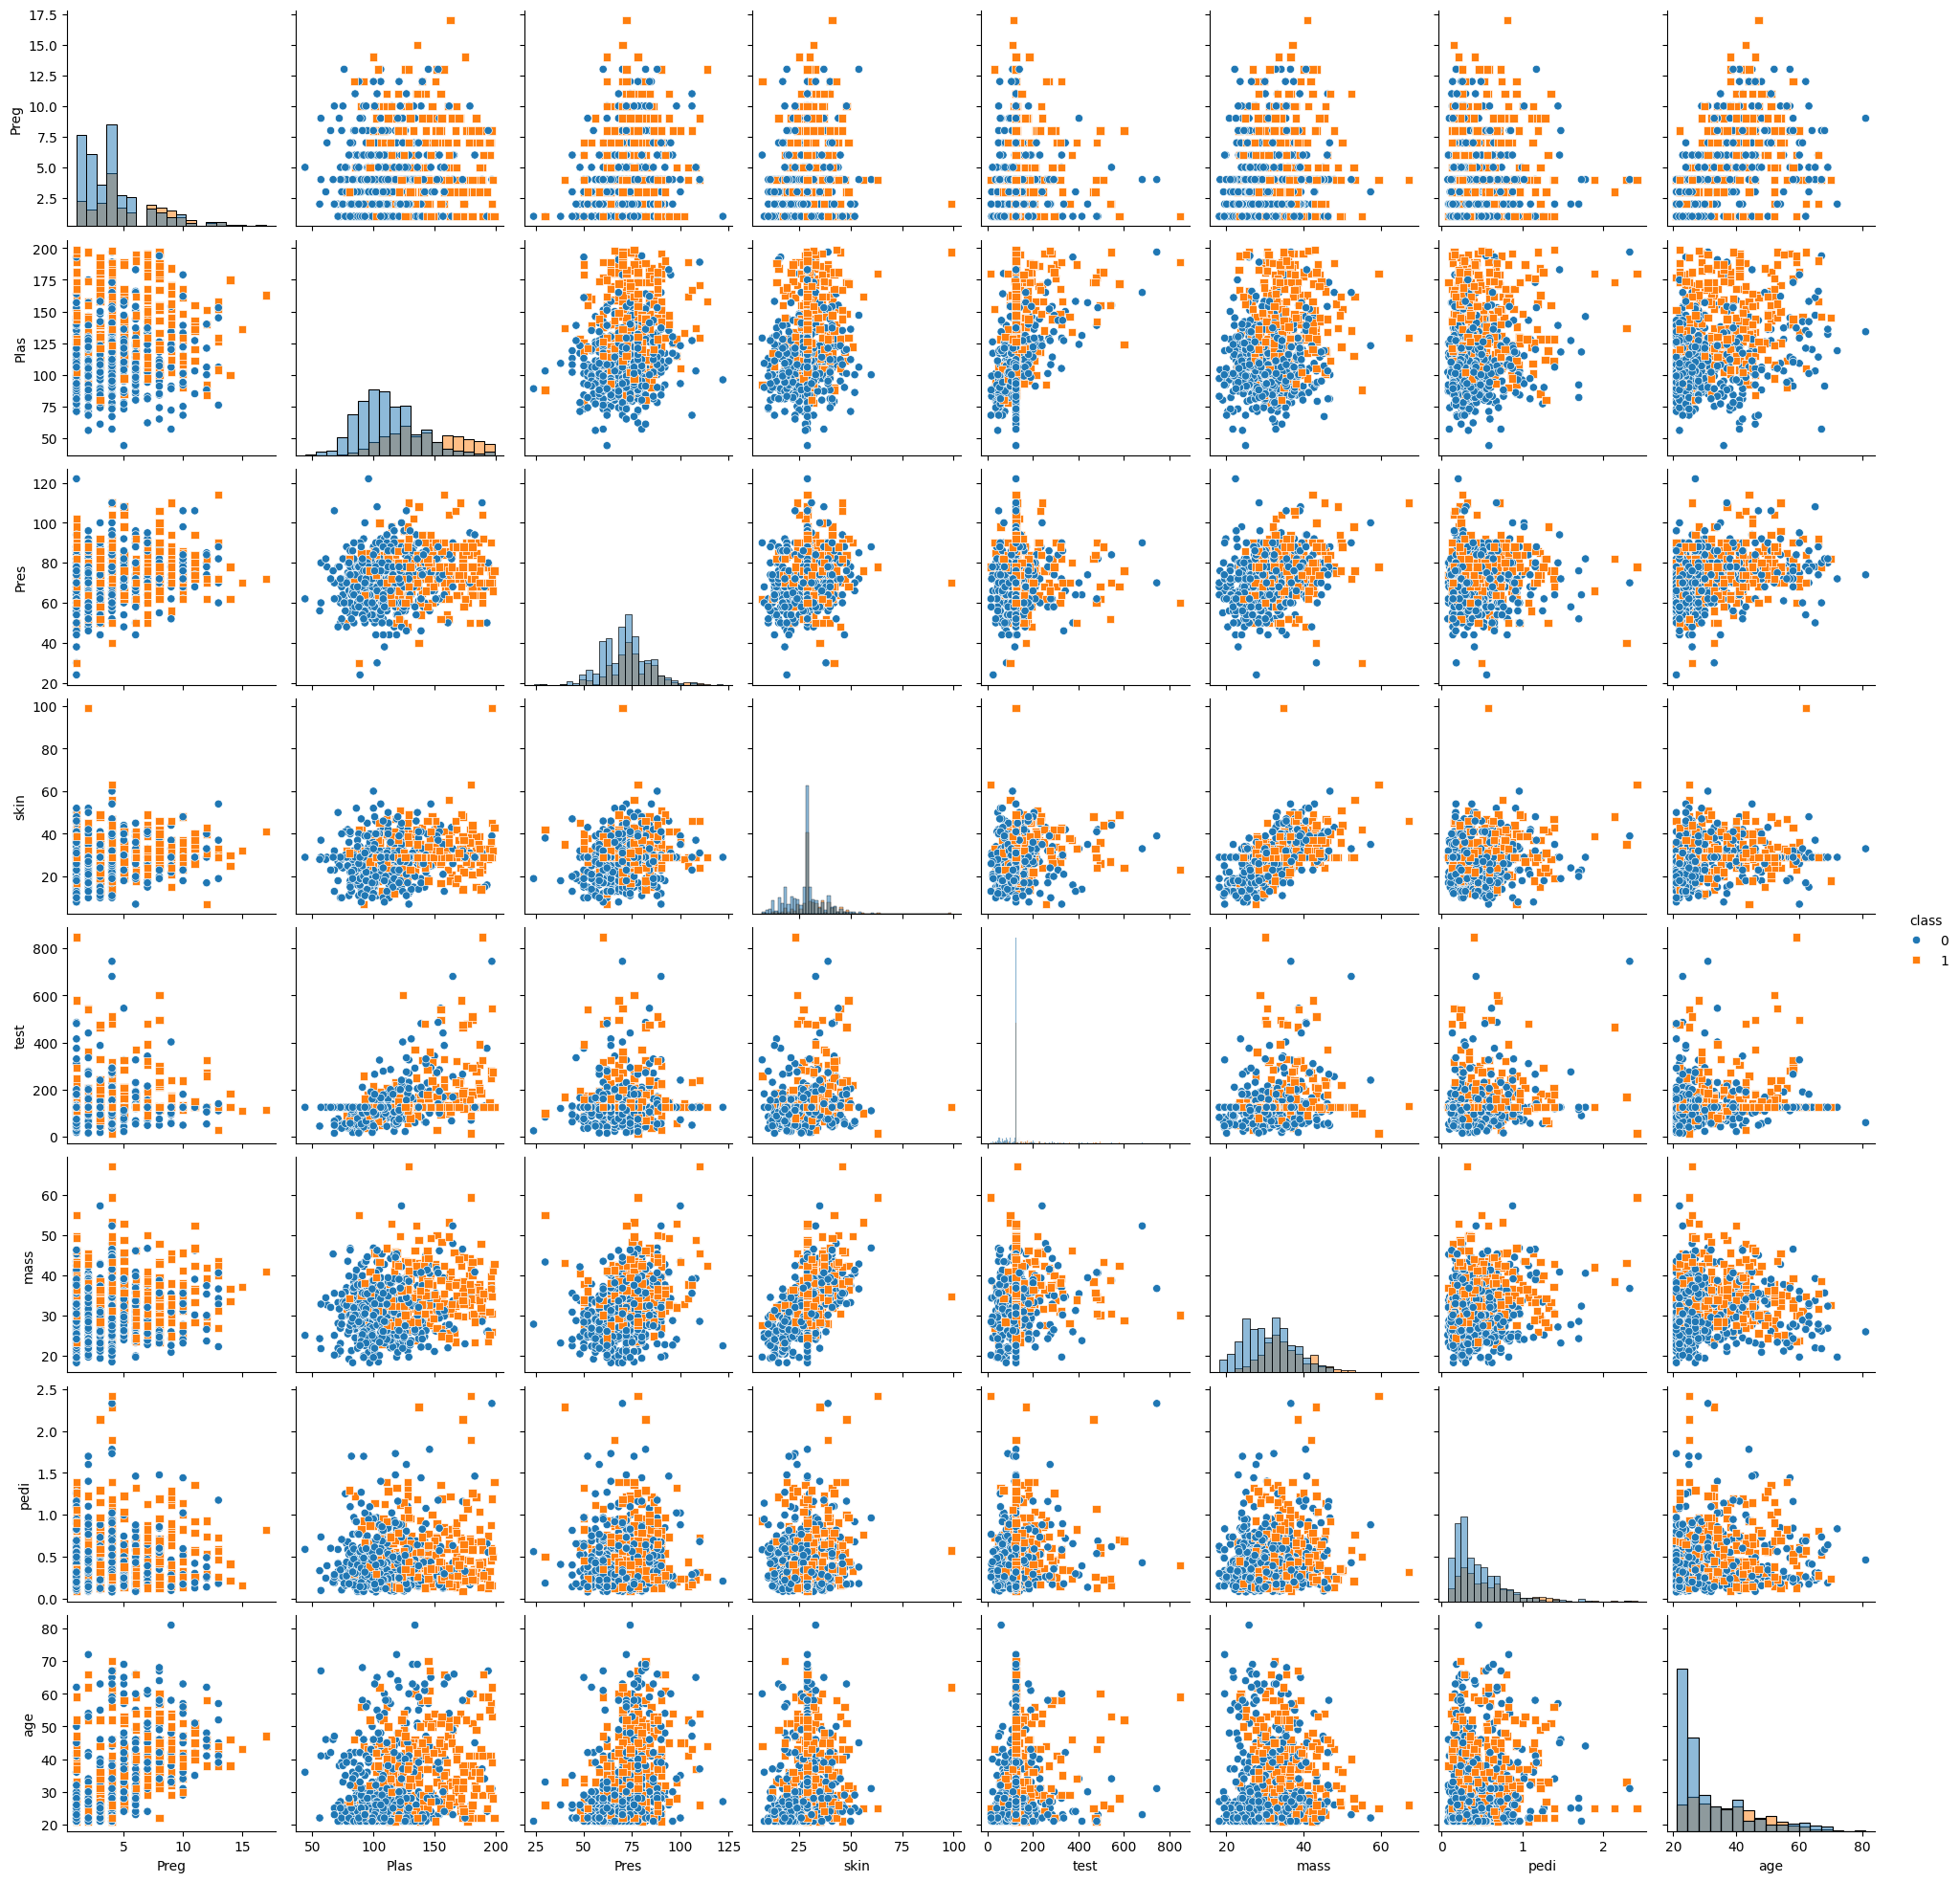

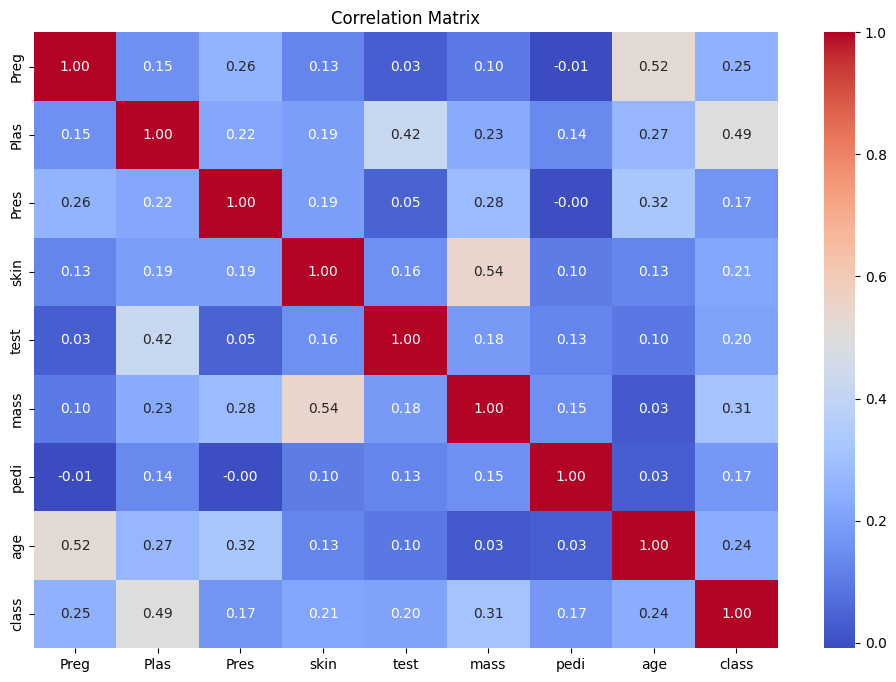

In [16]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
# Create pair plots to observe relationships
sns.pairplot(df, hue='class', markers=['o', 's'], diag_kind='hist')

# Display the pair plots
plt.show()

# Calculate and display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [19]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Define the features (X) and the target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model with "entropy" criterion
decision_tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


# 10. Print the accuracy of the model & print the confusion matrix

Test Accuracy: 0.70

Confusion Matrix:
[[108  43]
 [ 26  54]]


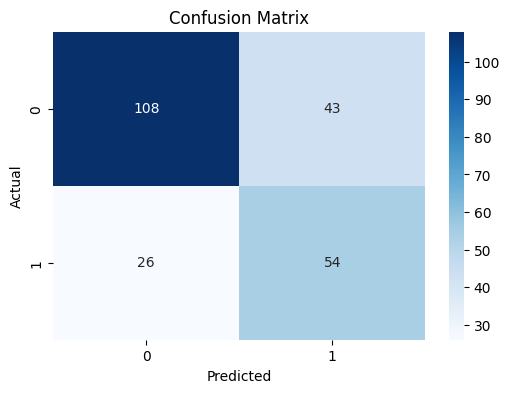

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_test_pred = decision_tree_model.predict(X_test)

# Print the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_rf = random_forest_model.predict(X_test)

# Print the accuracy of the Random Forest model on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Test Accuracy: {test_accuracy_rf:.2f}")


Random Forest Test Accuracy: 0.75


# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create an AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_adaboost = adaboost_model.predict(X_test)

# Print the accuracy of the AdaBoost model on the test set
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
print(f"AdaBoost Test Accuracy: {test_accuracy_adaboost:.2f}")


AdaBoost Test Accuracy: 0.73


# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Create a Bagging Classifier model
bagging_model = BaggingClassifier(random_state=42)

# Fit the model to the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_bagging = bagging_model.predict(X_test)

# Print the accuracy of the Bagging Classifier model on the test set
test_accuracy_bagging = accuracy_score(y_test, y_test_pred_bagging)
print(f"Bagging Classifier Test Accuracy: {test_accuracy_bagging:.2f}")


Bagging Classifier Test Accuracy: 0.73


# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoosting Classifier model
gradientboost_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gradientboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_gradientboost = gradientboost_model.predict(X_test)

# Print the accuracy of the GradientBoosting Classifier model on the test set
test_accuracy_gradientboost = accuracy_score(y_test, y_test_pred_gradientboost)
print(f"GradientBoosting Classifier Test Accuracy: {test_accuracy_gradientboost:.2f}")


GradientBoosting Classifier Test Accuracy: 0.73
